In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import urllib.request as request
from dotenv import load_dotenv
import os

load_dotenv()
API_KEY = os.getenv("ALPHA_VANTAGE_API")

In [55]:
test_start_data = "2020-01-01"

In [56]:
def get_data_for(ticker):
    url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={ticker}&outputsize=full&datatype=csv&apikey={API_KEY}"
    request.urlretrieve(url, "temp.csv")
    df = pd.read_csv("temp.csv")
    df = df[df["timestamp"] >= test_start_data]
    df = df.sort_values("timestamp")
    df = df.reset_index(drop=True)
    return df

In [57]:
spy_data = get_data_for("SPY")
spy_data.head()

,timestamp,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient
0,2020-01-02,323.54,324.89,322.53,324.87,302.010553,59037072,0.0,1.0
1,2020-01-03,321.16,323.64,321.10,322.41,299.723650,77708081,0.0,1.0
2,2020-01-06,320.49,323.73,320.36,323.64,300.867101,55596982,0.0,1.0
3,2020-01-07,323.02,323.54,322.24,322.73,300.021133,40461249,0.0,1.0
4,2020-01-08,322.94,325.78,322.67,324.45,301.620106,68177241,0.0,1.0


In [66]:
# Buy open, sell close strategy
initial_investment = 10000

portfolio_value = [initial_investment]
for i in range(len(spy_data)):
    portfolio_value.append(portfolio_value[-1]/spy_data["open"].iloc[i] * spy_data["close"].iloc[i])

portfolio_value = portfolio_value[1:]
spy_data["Buy on Open, Sell on Close"] = portfolio_value

# sns.lineplot(x="timestamp", y="portfolio_value", data=spy_data)
# plt.xticks(ticks=np.linspace(0, len(spy_data)-1, 10, dtype=int), rotation=45)
# plt.show()

In [67]:
# Buy and Hold Strategy
initial_investment = 10000

portfolio_value = []
for i in range(len(spy_data)):
    portfolio_value.append(initial_investment/spy_data["open"].iloc[0] * spy_data["close"].iloc[i])

spy_data["Buy and Hold Strategy"] = portfolio_value

# sns.lineplot(x="timestamp", y="portfolio_value", data=spy_data)
# plt.xticks(ticks=np.linspace(0, len(spy_data)-1, 10, dtype=int), rotation=45)
# plt.show()

In [ ]:
# Uniform Constant Rebalanced Portfolio
initial_investment = 10000

# XLC - 2018-07-02
# XLRE - 2015-10-08

etf_for_sectors = ["XLC", "XLY", "XLP", "XLE", "XLF", "XLV", "XLI", "XLB", "XLRE", "XLK", "XLU"]
df_for_sectors = [get_data_for(etf) for etf in etf_for_sectors]

portfolio_value = [initial_investment]
for i in range(len(spy_data)):
    investment_in_each = portfolio_value[-1]/len(etf_for_sectors)
    portfolio_value.append(0)
    for j in range(len(etf_for_sectors)):
        portfolio_value[-1] += investment_in_each/df_for_sectors[j]["open"].iloc[i] * df_for_sectors[j]["close"].iloc[i]

portfolio_value = portfolio_value[1:]
spy_data["Uniform Constant Rebalanced Portfolio"] = portfolio_value

# sns.lineplot(x="timestamp", y="portfolio_value", data=spy_data)
# plt.xticks(ticks=np.linspace(0, len(spy_data)-1, 10, dtype=int), rotation=45)
# plt.show()

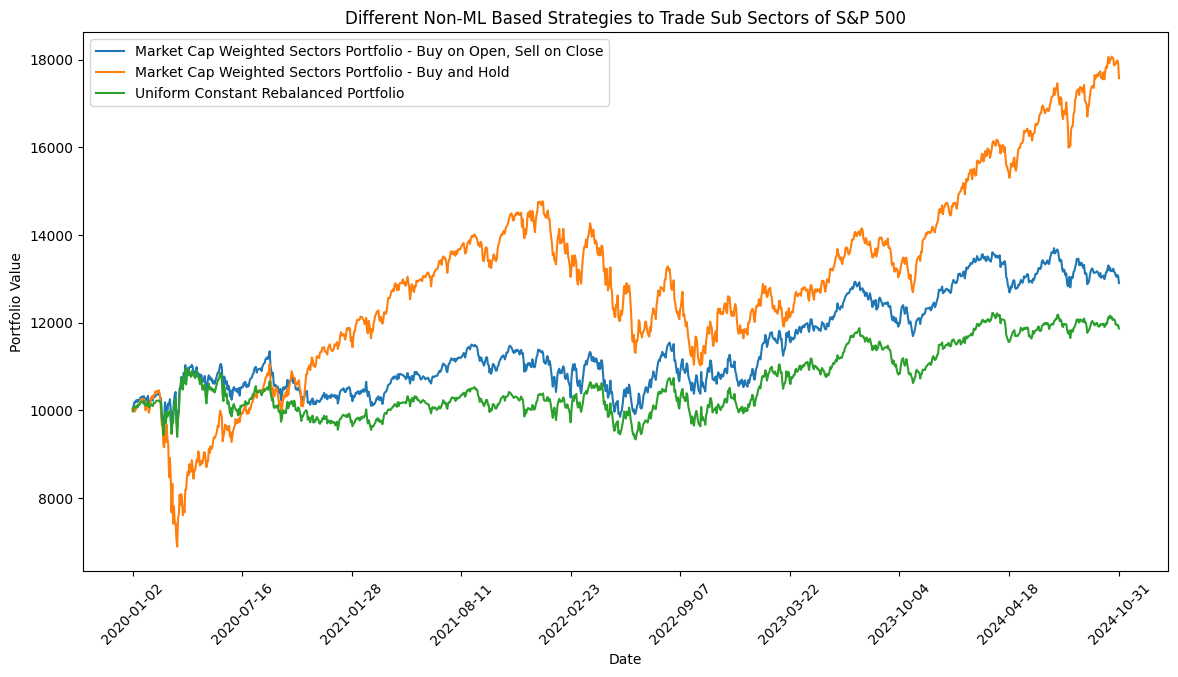

In [75]:
plt.figure(figsize=(14, 7))  # Adjust the width and height as needed
sns.lineplot(x="timestamp", y="Buy on Open, Sell on Close", data=spy_data, label="Market Cap Weighted Sectors Portfolio - Buy on Open, Sell on Close")
sns.lineplot(x="timestamp", y="Buy and Hold Strategy", data=spy_data, label="Market Cap Weighted Sectors Portfolio - Buy and Hold")
sns.lineplot(x="timestamp", y="Uniform Constant Rebalanced Portfolio", data=spy_data, label="Uniform Constant Rebalanced Portfolio")
plt.xticks(ticks=np.linspace(0, len(spy_data)-1, 10, dtype=int), rotation=45)
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.title("Different Non-ML Based Strategies to Trade Sub Sectors of S&P 500")
plt.legend()
plt.show()

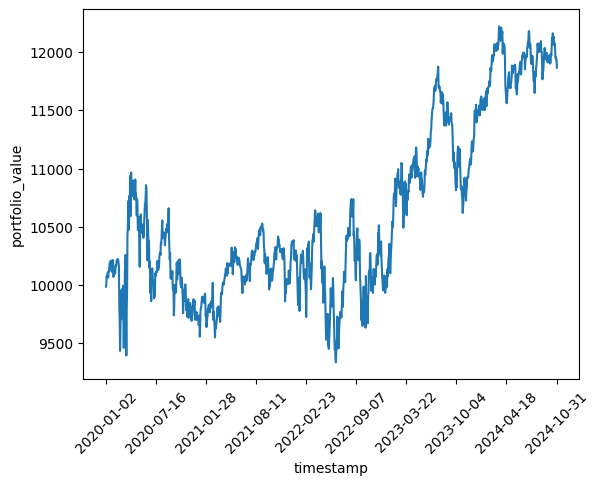

In [64]:
# Max Sector Strategy
initial_investment = 10000

etf_for_sectors = ["XLC", "XLY", "XLP", "XLE", "XLF", "XLV", "XLI", "XLB", "XLRE", "XLK", "XLU"]
df_for_sectors = [get_data_for(etf) for etf in etf_for_sectors]

portfolio_value = [initial_investment]
for i in range(len(spy_data)):
    ratio = np.mean([df_for_sectors[j]["close"].iloc[i]/df_for_sectors[j]["open"].iloc[i] for j in range(len(etf_for_sectors))])
    portfolio_value.append(portfolio_value[-1] * ratio)

portfolio_value = portfolio_value[1:]
spy_data["portfolio_value"] = portfolio_value

sns.lineplot(x="timestamp", y="portfolio_value", data=spy_data)
plt.xticks(ticks=np.linspace(0, len(spy_data)-1, 10, dtype=int), rotation=45)
plt.show()